In [1]:
# Download data from link and uzip the folder
#https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip

### Loading Data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
negative_images = os.listdir('G:/CONCRETE_CRACK/Negative')
positive_images = os.listdir('G:/CONCRETE_CRACK/Positive')

In [3]:
#Notice how the images are not sorted, so let's call the sort method to sort the images.
negative_images.sort()
positive_images.sort()

In [4]:
#Before we can show an image, we need to open it, which we can do using the **Image** module in the **PIL** library

image_data = Image.open('G:/CONCRETE_CRACK/Negative/{}'.format(negative_images[1]))

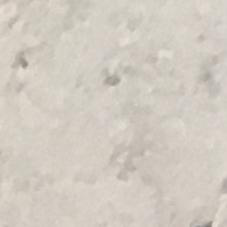

In [5]:
image_data

In [6]:
#Let's loop through all the images in the ./Negative directory and add save their paths.

negative_images_dir = ['G:/CONCRETE_CRACK/Negative/{}'.format(image) for image in negative_images]
positive_images_dir = ['G:/CONCRETE_CRACK/Positive/{}'.format(image) for image in positive_images]

In [7]:
positive_images_dir[:3]

['G:/CONCRETE_CRACK/Positive/00001.jpg',
 'G:/CONCRETE_CRACK/Positive/00002.jpg',
 'G:/CONCRETE_CRACK/Positive/00003.jpg']

In [8]:
#Let's check how many images with no cracks exist in the dataset.

print("Length Of Negative Images : ",len(negative_images_dir))

print("Length Of Positive Images : ",len(positive_images_dir))


Length Of Negative Images :  20000
Length Of Positive Images :  20000


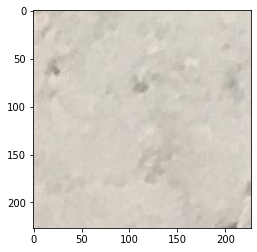

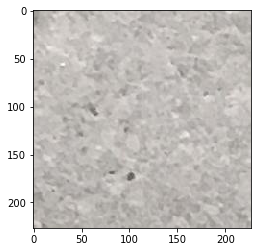

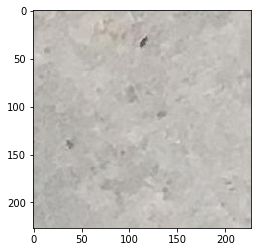

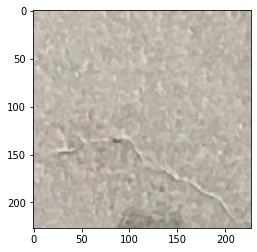

In [9]:
#Lets see next four images in Negative

for i in range(1,5):
    plt.imshow(Image.open('G:/CONCRETE_CRACK/Negative/{}'.format(negative_images[i])))
    plt.show()

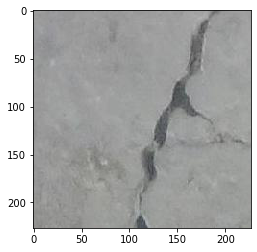

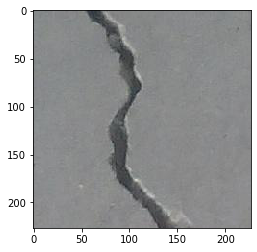

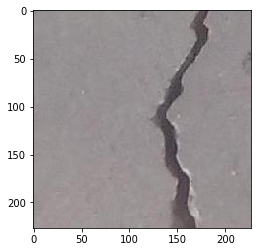

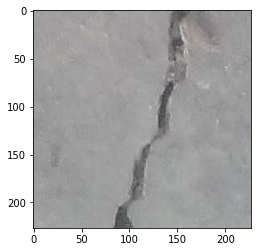

In [10]:
#Lets see next four images in Positive
for i in range(1,5):
    plt.imshow(Image.open('G:/CONCRETE_CRACK/Positive/{}'.format(positive_images[i])))
    plt.show()

### Data Preparation - Pytorch

In [11]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import glob
import torch
from torch.utils.data import Dataset

In [12]:
negative_images_dir = ['G:/CONCRETE_CRACK/Negative/{}'.format(image) for image in negative_images]
positive_images_dir = ['G:/CONCRETE_CRACK/Positive/{}'.format(image) for image in positive_images]

negative_images_dir[:3]

['G:/CONCRETE_CRACK/Negative/00001.jpg',
 'G:/CONCRETE_CRACK/Negative/00002.jpg',
 'G:/CONCRETE_CRACK/Negative/00003.jpg']

In [13]:
positive_images_dir[:3]

['G:/CONCRETE_CRACK/Positive/00001.jpg',
 'G:/CONCRETE_CRACK/Positive/00002.jpg',
 'G:/CONCRETE_CRACK/Positive/00003.jpg']

In [14]:
number_of_samples=len(negative_images_dir) + len(positive_images_dir) 
number_of_samples

40000

In [15]:
#In this section we will assign a label to each image in this case we  can assign the positive images,
#i.e images with a crack to a value one  and the negative images i.e images with out a crack to a value of
#zero . First we create a tensor or vector of zeros, each element corresponds to a new sample.
#The length of the tensor is equal to the number of samples

Y=torch.zeros([number_of_samples])

Y=Y.type(torch.LongTensor)
Y.type()


'torch.LongTensor'

In [16]:
#With respect to each element we will set the even elements to class one and the odd elements to class zero.
Y[::2]=1
Y[1::2]=0

In [17]:
#Creating a list all_files such that the even indexes contain the path to images with positive or
#cracked samples and the odd element contain the negative images or images with out cracks. 

all_files = [None]*(len(positive_images_dir)+len(negative_images_dir))
all_files[::2] = positive_images_dir
all_files[1::2] = negative_images_dir

all_files[0:5]

['G:/CONCRETE_CRACK/Positive/00001.jpg',
 'G:/CONCRETE_CRACK/Negative/00001.jpg',
 'G:/CONCRETE_CRACK/Positive/00002.jpg',
 'G:/CONCRETE_CRACK/Negative/00002.jpg',
 'G:/CONCRETE_CRACK/Positive/00003.jpg']

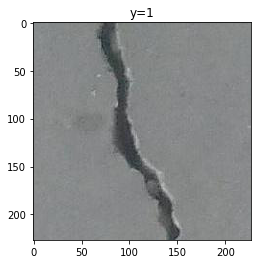

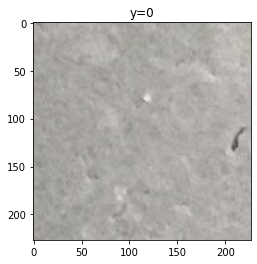

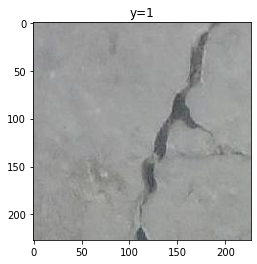

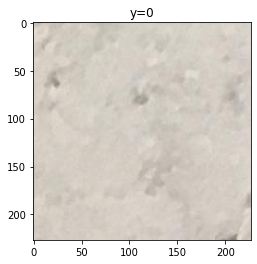

In [18]:
#Print samples
for y,file in zip(Y, all_files[0:4]):
    plt.imshow(Image.open(file))
    plt.title("y="+str(y.item()))
    plt.show()

In [20]:
def func(train):
    """
    train=False returns Train set
    train=True returns Validation set
    """
    
    number_of_samples = len(positive_images_dir) + len(negative_images_dir)
    
    Y=torch.zeros([number_of_samples])
    Y=Y.type(torch.LongTensor)
    Y.type()
    Y[::2]=1
    Y[1::2]=0
    
    all_files = [None]*(len(positive_images_dir)+len(negative_images_dir))
    all_files[::2] = positive_images_dir
    all_files[1::2] = negative_images_dir

    if train:
        all_files=all_files[0:30000]
        Y=Y[0:30000]

    else:
        all_files=all_files[30000:]
        Y=Y[30000:]
        
    return all_files, Y
    
all_files, Y = func(train=True)

In [21]:
len(all_files)

30000

In [25]:
#Creating a Dataset Class

class Dataset(Dataset):
    def __init__(self,transform=None,train=True):
        negative_images = os.listdir('G:/CONCRETE_CRACK/Negative')
        positive_images = os.listdir('G:/CONCRETE_CRACK/Positive')
        
        negative_images.sort()
        positive_images.sort()
        
        negative_images_dir = ['G:/CONCRETE_CRACK/Negative/{}'.format(image) for image in negative_images]
        positive_images_dir = ['G:/CONCRETE_CRACK/Positive/{}'.format(image) for image in positive_images]
        
        number_of_samples=len(positive_images_dir)+len(negative_images_dir)
        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_images_dir
        self.all_files[1::2]=negative_images_dir 

        # The transform is goint to be used on image
        self.transform = transform
        
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0
        
        if train:
            self.all_files = self.all_files[0:30000]
            self.Y=self.Y[0:30000]
            self.len=len(self.all_files)
        else:
            self.all_files = self.all_files[30000:]
            self.Y=self.Y[30000:]
            self.len=len(self.all_files)
           
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):        
        image=Image.open(self.all_files[idx])
        y=self.Y[idx]
          
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [26]:
import torchvision.transforms as transforms

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform =transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean, std)])
dataset_train=Dataset(transform=transform,train=True)

### Data Preparation - Keras

In [27]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [28]:
Dataset_Dir = 'G:/CONCRETE_CRACK'

# instantiate your image data generator
data_generator = ImageDataGenerator()

In [29]:
#data_generator = ImageDataGenerator(rescale=1./255)

image_generator = data_generator.flow_from_directory(
    Dataset_Dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 40000 images belonging to 2 classes.


In [30]:
first_batch_images = image_generator.next()[0]
first_batch_images

array([[[[151., 149., 150.],
         [153., 151., 152.],
         [155., 153., 154.],
         ...,
         [153., 149., 148.],
         [153., 149., 148.],
         [153., 149., 148.]],

        [[152., 150., 151.],
         [154., 152., 153.],
         [156., 154., 155.],
         ...,
         [154., 150., 149.],
         [154., 150., 149.],
         [154., 150., 149.]],

        [[153., 151., 152.],
         [155., 153., 154.],
         [156., 154., 155.],
         ...,
         [156., 152., 151.],
         [156., 152., 151.],
         [156., 152., 151.]],

        ...,

        [[142., 140., 143.],
         [142., 140., 143.],
         [142., 140., 143.],
         ...,
         [139., 135., 136.],
         [142., 138., 139.],
         [145., 141., 142.]],

        [[142., 140., 143.],
         [142., 140., 143.],
         [142., 140., 143.],
         ...,
         [140., 136., 137.],
         [142., 138., 139.],
         [146., 142., 143.]],

        [[142., 140., 143.],
       

In [31]:
first_batch_labels = image_generator.next()[1]
first_batch_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

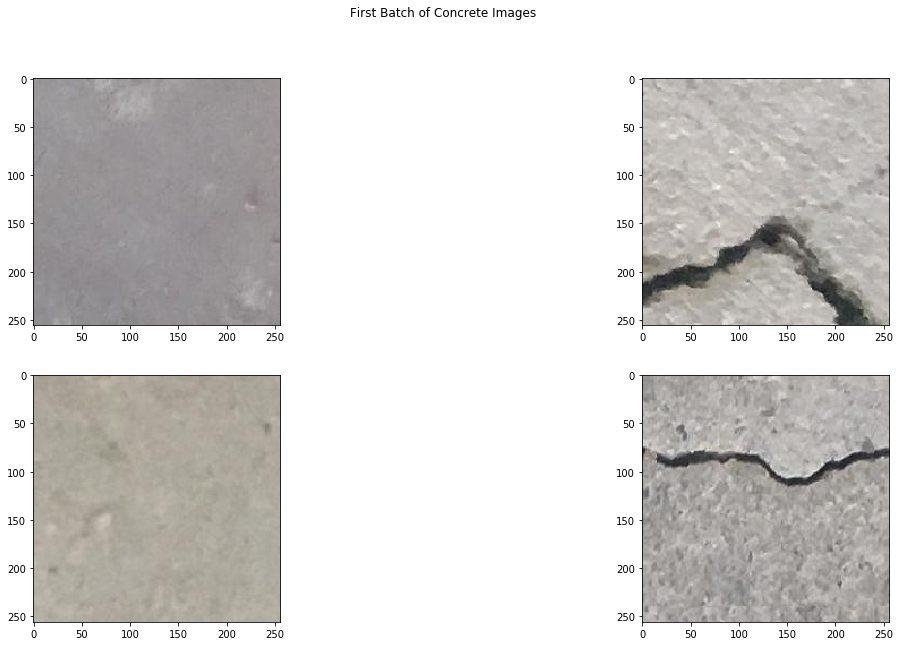

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        #image_data = first_batch_images[ind]
        image_data = first_batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()

In [33]:
#scaling images
data_generator = ImageDataGenerator(rescale=1./255)

image_generator = data_generator.flow_from_directory(
    Dataset_Dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 40000 images belonging to 2 classes.


### Linear Classifier PyTorch

In [34]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
from torch import optim 

In [35]:
#Create object for the training data dataset_train and validation dataset_val. 
#Use the transform object to convert the images to tensors using the transform object:

dataset_train=Dataset(transform=transform,train=True)
dataset_val=Dataset(transform=transform,train=False)

In [36]:
dataset_train[0][0].shape

torch.Size([3, 227, 227])

In [37]:
#We see that it's a color image with three channels
size_of_image=3*227*227
size_of_image

154587

In [44]:
class SoftMax(nn.Module):
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        z = self.linear(x)
        return z

In [45]:
input_dim=3*227*227
output_dim=2

In [46]:
model = SoftMax(input_dim, output_dim)
print("Print the model:\n ", model)

Print the model:
  SoftMax(
  (linear): Linear(in_features=154587, out_features=2, bias=True)
)


In [47]:
print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

W:  torch.Size([2, 154587])
b:  torch.Size([2])


In [49]:
#Optimizer

learning_rate=0.1
momentum=0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

In [50]:
#Criterion

criterion = nn.CrossEntropyLoss()

In [52]:
#data loader

train_loader=torch.utils.data.DataLoader(dataset=dataset_train, batch_size=1000)
validation_loader=torch.utils.data.DataLoader(dataset=dataset_val, batch_size=1000)

In [57]:
#Training model

n_epochs = 5
loss_list = []
accuracy_list = []
N_test = len(dataset_val)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 3 * 227 * 227))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
        correct = 0
        # perform a prediction on the validationdata  
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 3 * 227 * 227))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)

train_model(n_epochs)

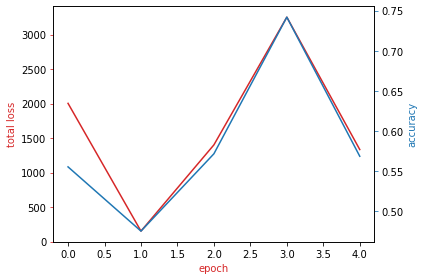

In [58]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [59]:
accuracy_list

[0.5555, 0.4755, 0.5718, 0.742, 0.5687]

In [ ]:
model.save('linear_classifier_pytorch.h5')

### Building a Classifier with ResNet50 - Tensorflow

In [ ]:
#Download the data and unzip it
#https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week3.zip
#This data is already splitted to train and validation

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [62]:
num_classes = 2

image_resize = 224*224

batch_size_training = 100
batch_size_validation = 100

In [63]:
#In order to instantiate an ImageDataGenerator instance, we will set the **preprocessing_function** argument 
#to *preprocess_input* which we imported from **keras.applications.resnet50** in order to preprocess 
#our images the same way the images used to train ResNet50 model were processed.


data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [69]:
train_generator = data_generator.flow_from_directory(
    'G:/concrete_data_week3/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
    'G:/concrete_data_week3/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

Found 30001 images belonging to 2 classes.
Found 10001 images belonging to 2 classes.


In [73]:
model = Sequential()

model.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

model.add(Dense(num_classes, activation='softmax'))

model.layers

In [74]:
model.layers[0].trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
#Use Google Colab 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 2

fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)


model.save('classifier_resnet_model.h5')

### Building a Classifier with VGG16 - Tensorflow

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'G:/concrete_data_week3/train'
valid_path = 'G:/concrete_data_week3/valid'

In [3]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
# useful for getting number of classes
folders = glob('G:/dataset/training_set/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('G:/concrete_data_week3/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('G:/concrete_data_week3/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 30001 images belonging to 2 classes.
Found 10001 images belonging to 2 classes.


In [14]:
#Train with google colab
model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 938 steps, validate for 313 steps
  9/938 [..............................] - ETA: 2:28:14 - loss: 0.7736 - accuracy: 0.6328

KeyboardInterrupt: 

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
model.save('facefeatures_new_model.h5')